# Explo BDNB

Il s'agit ici d'évaluer la surface de bureaux totale à Montrouge.

A voir également : 
* [cette issue](https://gitlab.com/BDNB/base_nationale_batiment/-/issues/639) sur leur base ;
* la documentation de leur DB est très complète (fichier `documentation.xlsx` dans le dossier `Ecologie - EELV\data\open_data_millesime_2022-10-d_dep92_csv`, regarder les différents onglets).

## Questions côté BDNB

(merci pour la colonne `l_usage_1` !)

* A quoi correspond la colonne 's_geom_group' dans `batiment_groupe` => voir la documentation = "(bdnb) Surface au sol de la géométrie du bâtiment groupe (geom_groupe)"
* Sur OSM, existence d'un attribut "level"... Comment lier les données OSM avec celles de la BDNB ? Projet BANO + clé interopérable, mais au niveau de l'adresse... Préférence pour une approche à la maille bâtiment.
* Est-ce que toutes les bâtiments disponibles dans la base sont consultables à travers GoRenove ? C'est important pour ma question suivante...
* Quel est le traitement 'attendu' pour les écoles ? Dans la base, je vois à la fois :

    * certaines "cités scolaires" sont enregistrées (par exemple l'école du Haut-Mesnil, 20 rue arthur auger, 92120, Montrouge), quitte à ce que les données DPE manquent ;
    * d'autres bâtiments d'école (par exemple à l'adresse 87, avenue Aristide Briand, Montrouge) semblent être absents de la base .

Je comprends tout à fait que ces bâtiments ne correspondent pas à la mission principale de GoRenove. Cependant au niveau de la BDNB, il pourrait être intéressant à plus long terme de les gérer de façon uniforme, peut-être en se basant sur [l'annuaire de l'éducation](https://data.education.gouv.fr/explore/dataset/fr-en-annuaire-education/information/) du ministère de l'éducation nationale ? Voir même d'en faire une catégorie supplémentaire pour raffiner le champ "Usage principal du bâtiment"...

* Le bâtiment https://particulier.gorenove.fr/map?bnb_id=920490000L0097_3d73b7a78466609 me paraît assez mystérieux (il est noté comme géométrie fictive, avec deux constructions...)

# Préliminaires

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd

DATA_DIR = Path("../data/open_data_millesime_2022-10-d_dep92_csv/csv")

bat_key = "batiment_groupe_id"

## Bâtiment groupe

Permet de récupérer les identifiants des bâtiments à Montrouge

In [8]:
bat_gp_df = pd.read_csv(DATA_DIR / "batiment_groupe.csv", index_col=bat_key)

In [9]:
bat_montrouge = bat_gp_df[bat_gp_df["code_commune_insee"] == 92049]

In [10]:
bat_montrouge

,geom_groupe,code_departement_insee,s_geom_groupe,code_iris,code_commune_insee,libelle_commune_insee,code_epci_insee,contient_fictive_geom_groupe
batiment_groupe_id,,,,,,,,
920490000D0246_02a594850f8fa2c,MULTIPOLYGON (((650498.838132271 6857859.26495...,92,NaN,920490110.0,92049.0,Montrouge,200054781.0,1
920490000B0060_a56a1f951a942fc,MULTIPOLYGON (((650025.933199599 6858101.34075...,92,NaN,920490101.0,92049.0,Montrouge,200054781.0,1
920490000B0062_324a788108e7010,MULTIPOLYGON (((650006.348617242 6858073.53295...,92,NaN,920490101.0,92049.0,Montrouge,200054781.0,1
920490000B0077_c20910dfd874b5a,MULTIPOLYGON (((650031.967591376 6858058.83293...,92,NaN,920490101.0,92049.0,Montrouge,200054781.0,1
920490000B0078_25f800e09483e07,MULTIPOLYGON (((650035.168975084 6858066.13530...,92,NaN,920490101.0,92049.0,Montrouge,200054781.0,1
...,...,...,...,...,...,...,...,...
uf920490009883_d00af99ac891fcc,"MULTIPOLYGON (((649361.6 6857452.4,649361.8 68...",92,563.0,920490105.0,92049.0,Montrouge,200054781.0,0
uf920490009705_46d68ccb4167270,"MULTIPOLYGON (((649580.3 6857967.7,649581.3 68...",92,1161.0,920490101.0,92049.0,Montrouge,200054781.0,0
uf920490024401_19e9d8bf322bb27,"MULTIPOLYGON (((649876.4 6857070.5,649872.1 68...",92,3395.0,920490111.0,92049.0,Montrouge,200054781.0,0


In [8]:
bat_montrouge["libelle_commune_insee"].unique()

array(['Montrouge'], dtype=object)

## Source 'ffo'

In [10]:
bat_gp_ffo = pd.read_csv(DATA_DIR / "batiment_groupe_ffo_bat.csv")

In [15]:
aux_ffo_df = bat_gp_ffo[bat_gp_ffo[bat_key].isin(bat_montrouge.index)]

In [16]:
len(aux_ffo_df)

1928

In [17]:
aux_ffo_df["usage_niveau_1_txt"].unique()

array(['Tertiaire & Autres', 'Résidentiel individuel',
       'Résidentiel collectif', 'Dépendance', 'Secondaire'], dtype=object)

In [18]:
aux_ffo_df["usage_niveau_1_txt"].value_counts()

Résidentiel collectif     978
Résidentiel individuel    675
Tertiaire & Autres        252
Dépendance                 21
Secondaire                  2
Name: usage_niveau_1_txt, dtype: int64

In [19]:
ffo_ids = aux_ffo_df[aux_ffo_df["usage_niveau_1_txt"]=="Tertiaire & Autres"][bat_key]

In [20]:
ffo_ids

1180      920490000D0246_02a594850f8fa2c
1204      920490000C0088_3a2024023e2b693
1218      920490000C0122_cc78e7c12a6c579
1220      920490000C0168_c9fdd9016ae04f4
1225      920490000D0070_670da366622432e
                       ...              
112930    uf920490009865_108d32dbba967a1
112931    uf920490009871_74a0268761263cf
112943    uf920490024401_19e9d8bf322bb27
112944    uf920490024406_ce635c1d89ccc10
112945    uf920490024409_2d260cac62ede88
Name: batiment_groupe_id, Length: 252, dtype: object

## <a id='source_ign'>Source IGN</a>

NB : pour faire tourner cette section, il est nécessaire d'avoir généré `bat_montrouge`.

In [6]:
bat_gp_ign = pd.read_csv(DATA_DIR / "batiment_groupe_bdtopo_bat.csv")

In [12]:
aux_ign_df = bat_gp_ign[bat_gp_ign[bat_key].isin(bat_montrouge.index)]

In [14]:
aux_ign_df

,batiment_groupe_id,code_departement_insee,l_nature,l_usage_1,l_usage_2,l_etat,hauteur_mean,altitude_sol_mean
1199,920490000D0246_02a594850f8fa2c,92,NaN,NaN,NaN,NaN,5,NaN
1201,920490000B0060_a56a1f951a942fc,92,NaN,NaN,NaN,NaN,9,NaN
1202,920490000B0062_324a788108e7010,92,NaN,NaN,NaN,NaN,9,NaN
1203,920490000B0077_c20910dfd874b5a,92,NaN,NaN,NaN,NaN,6,NaN
1204,920490000B0078_25f800e09483e07,92,NaN,NaN,NaN,NaN,6,NaN
...,...,...,...,...,...,...,...,...
115560,uf920490009883_d00af99ac891fcc,92,"[ ""Indifférenciée"" ]","[ ""Résidentiel"", ""Annexe"" ]","[ ""Annexe"" ]","[ ""En service"" ]",22,73.0
115563,uf920490009705_46d68ccb4167270,92,"[ ""Industriel, agricole ou commercial"", ""Indif...","[ ""Indifférencié"", ""Résidentiel"", ""Commercial ...","[ ""Annexe"" ]","[ ""En service"" ]",15,68.0
115571,uf920490024401_19e9d8bf322bb27,92,"[ ""Indifférenciée"", ""Industriel, agricole ou c...","[ ""Commercial et services"", ""Sportif"", ""Réside...","[ ""Résidentiel"" ]","[ ""En service"" ]",7,79.0
115572,uf920490024406_ce635c1d89ccc10,92,"[ ""Industriel, agricole ou commercial"", ""Eglis...","[ ""Industriel"", ""Religieux"" ]",NaN,"[ ""En service"" ]",9,75.0


In [28]:
def get_list(input_val):
    if pd.notnull(input_val):
        return literal_eval(input_val)
    
    return []

In [29]:
aux_ign_df["l_usage_1_val"] = aux_ign_df["l_usage_1"].apply(get_list)

/tmp/ipykernel_247998/4157673526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_ign_df["l_usage_1_val"] = aux_ign_df["l_usage_1"].apply(get_list)


In [30]:
aux_ign_df["l_nature_val"] = aux_ign_df["l_nature"].apply(get_list)

/tmp/ipykernel_247998/1006479930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_ign_df["l_nature_val"] = aux_ign_df["l_nature"].apply(get_list)


In [31]:
aux_ign_df[["l_usage_1_val", "l_nature_val"]]

,l_usage_1_val,l_nature_val
1199,[],[]
1201,[],[]
1202,[],[]
1203,[],[]
1204,[],[]
...,...,...
115560,"[Résidentiel, Annexe]",[Indifférenciée]
115563,"[Indifférencié, Résidentiel, Commercial et ser...","[Industriel, agricole ou commercial, Indiffére..."
115571,"[Commercial et services, Sportif, Résidentiel,...","[Indifférenciée, Industriel, agricole ou comme..."
115572,"[Industriel, Religieux]","[Industriel, agricole ou commercial, Eglise]"


#### Liste des usages et natures

Pour <a id='usages_natures'>référence ultérieure</a>.

In [32]:
set(aux_ign_df["l_usage_1_val"].sum())

{'Annexe',
 'Commercial et services',
 'Indifférencié',
 'Industriel',
 'Religieux',
 'Résidentiel',
 'Sportif'}

In [33]:
set(aux_ign_df["l_nature_val"].sum())

{'Eglise',
 'Indifférenciée',
 'Industriel, agricole ou commercial',
 'Tour, donjon',
 'Tribune'}

#### Récupération (naïve ?) des commerces et services

In [35]:
comm_bat_df = aux_ign_df[aux_ign_df["l_usage_1_val"].apply(lambda x: "Commercial et services" in x)]

In [36]:
len(comm_bat_df)

228

In [37]:
ign_ids = comm_bat_df[bat_key]

## Adresses

In [18]:
adresse_df = pd.read_csv(DATA_DIR / "batiment_groupe_adresse.csv", index_col=bat_key)

In [39]:
adresse_df

,code_departement_insee,cle_interop_adr_principale_ban,libelle_adr_principale_ban,nb_adresse_valid_ban,fiabilite_cr_adr_niv_1,fiabilite_cr_adr_niv_2
batiment_groupe_id,,,,,,
92002000BN0119_042afe047dae260,92,92002_7252_00042,"42 avenue du president j fitzgerald kennedy, 9...",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
92002000BN0120_dca7b442f5c5ffd,92,92002_7252_00040,"40 avenue du president j fitzgerald kennedy, 9...",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
92002000BN0121_032d5c6df70841b,92,92002_7252_00038,"38 avenue du president j fitzgerald kennedy, 9...",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
92002000AK0147_8ff760b772bb802,92,92002_0011_00003_ter,"3 T rue de l'abbaye, 92160, Antony",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
92020000AB0039_a32f61915572231,92,92020_7110_00100,"100 avenue de la paix, 92320, Châtillon",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
...,...,...,...,...,...,...
uf920780018928_1e483ebde95df8e,92,92078_3565_00087,"87 rue du fond de la noue, 92390, Villeneuve-l...",3,données croisées à l'adresse moyennement fiables,batiment sur parcelle unifiee avec adresses no...
uf920780021713_9a5df4670392fe2,92,92078_1449_00288,"288 boulevard charles de gaulle, 92390, Villen...",14,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920780026586_60d0262b3e23da0,92,92078_9160_00104,"104 avenue de verdun, 92390, Villeneuve-la-Gar...",2,données croisées à l'adresse fiables,batiment sans voisin à l'adresse


In [40]:
adresse_df.loc['920490000B0112_83be3b044bfe333']

code_departement_insee                                                      92
cle_interop_adr_principale_ban                                92049_8160_00032
libelle_adr_principale_ban        32 avenue de la republique, 92120, Montrouge
nb_adresse_valid_ban                                                         2
fiabilite_cr_adr_niv_1                    données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                        batiment sans voisin à l'adresse
Name: 920490000B0112_83be3b044bfe333, dtype: object

## Comparaison 'ffo' et IGN

In [41]:
ign_ids 

3599      920490000F0156_a9d8814bafa2aee
3618      920490000B0004_75d4804dd285658
3623      920490000I0001_29db62f7a7b28c3
3624      920490000I0041_51528f9ee20ba28
3625      920490000I0042_fd3dcef77b32e1d
                       ...              
115558    uf920490009865_108d32dbba967a1
115559    uf920490009871_74a0268761263cf
115563    uf920490009705_46d68ccb4167270
115571    uf920490024401_19e9d8bf322bb27
115573    uf920490024409_2d260cac62ede88
Name: batiment_groupe_id, Length: 228, dtype: object

In [42]:
ffo_ids

1180      920490000D0246_02a594850f8fa2c
1204      920490000C0088_3a2024023e2b693
1218      920490000C0122_cc78e7c12a6c579
1220      920490000C0168_c9fdd9016ae04f4
1225      920490000D0070_670da366622432e
                       ...              
112930    uf920490009865_108d32dbba967a1
112931    uf920490009871_74a0268761263cf
112943    uf920490024401_19e9d8bf322bb27
112944    uf920490024406_ce635c1d89ccc10
112945    uf920490024409_2d260cac62ede88
Name: batiment_groupe_id, Length: 252, dtype: object

In [43]:
import numpy as np

In [44]:
diff_ids = np.setdiff1d(ign_ids, ffo_ids)
len(diff_ids)

78

In [45]:
adresse_df[adresse_df.index.isin(diff_ids)]

,code_departement_insee,cle_interop_adr_principale_ban,libelle_adr_principale_ban,nb_adresse_valid_ban,fiabilite_cr_adr_niv_1,fiabilite_cr_adr_niv_2
batiment_groupe_id,,,,,,
920490000B0235_3061106321ee73e,92,92049_4110_00052,"52 rue gabriel peri, 92120, Montrouge",1,données croisées à l'adresse moyennement fiables,batiment sur parcelle unifiee avec adresses no...
uf920490016739_22e882ef8714ccf,92,92049_0085_00014,"14 rue auber, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490024400_cfecfb27df7d3e8,92,92049_6850_00001_bis,"1 B rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490009855_87ba8c55e765abf,92,92049_5160_00016,"16 rue louis lejeune, 92120, Montrouge",2,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000F0072_6fcc1d6a1ff3199,92,92049_0045_00083,"83 avenue aristide briand, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
...,...,...,...,...,...,...
920490000X0048_677e81999a5fa38,92,92049_1455_00004,"4 rue chopin, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000X0062_02af010a01da674,92,92049_7161_00203,"203 avenue pierre brossolette, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000S0061_5d10f7f257477ea,92,92049_1415_00039,"39 rue carves, 92120, Montrouge",40,données croisées à l'adresse fiables,batiment dont les seuls voisins sont des dépen...


# Constitution d'une table des bâtiments de Montrouge

## Point de départ - bâtiment groupe

In [46]:
bat_gp_df = pd.read_csv(DATA_DIR / "batiment_groupe.csv", index_col=bat_key)

bat_montrouge = bat_gp_df[bat_gp_df["code_commune_insee"] == 92049][['s_geom_groupe', 'contient_fictive_geom_groupe']]

## Enrichissement de la donnée : ajout des sources

In [47]:
bat_gp_ffo = pd.read_csv(DATA_DIR / "batiment_groupe_ffo_bat.csv", index_col=bat_key)

In [48]:
bat_gp_ign = pd.read_csv(DATA_DIR / "batiment_groupe_bdtopo_bat.csv", index_col=bat_key)

In [110]:
bat_gp_ffo[["annee_construction", "usage_niveau_1_txt"]]

,annee_construction,usage_niveau_1_txt
batiment_groupe_id,,
92002000BN0119_042afe047dae260,1964.0,Résidentiel individuel
92002000BN0120_dca7b442f5c5ffd,1890.0,Résidentiel collectif
92002000BN0121_032d5c6df70841b,1921.0,Tertiaire & Autres
92002000AK0147_8ff760b772bb802,2013.0,Résidentiel individuel
92020000AB0039_a32f61915572231,1933.0,Résidentiel individuel
...,...,...
uf920780018928_1e483ebde95df8e,2014.0,Tertiaire & Autres
uf920780021713_9a5df4670392fe2,1930.0,Résidentiel individuel
uf920780026586_60d0262b3e23da0,2002.0,Tertiaire & Autres


In [50]:
merge_1 = bat_montrouge.merge(bat_gp_ffo[["annee_construction", "usage_niveau_1_txt"]], how='left', right_index=True, left_index=True)

In [51]:
full_bat_montrouge = merge_1.merge(bat_gp_ign["l_usage_1"], how='left', right_index=True, left_index=True)

In [52]:
full_bat_montrouge

,s_geom_groupe,contient_fictive_geom_groupe,annee_construction,usage_niveau_1_txt,l_usage_1
batiment_groupe_id,,,,,
920490000D0246_02a594850f8fa2c,NaN,1,NaN,Tertiaire & Autres,NaN
920490000B0060_a56a1f951a942fc,NaN,1,1898.0,Résidentiel individuel,NaN
920490000B0062_324a788108e7010,NaN,1,1871.0,Résidentiel individuel,NaN
920490000B0077_c20910dfd874b5a,NaN,1,1912.0,Résidentiel individuel,NaN
920490000B0078_25f800e09483e07,NaN,1,1890.0,Résidentiel individuel,NaN
...,...,...,...,...,...
uf920490009883_d00af99ac891fcc,563.0,0,1970.0,Résidentiel collectif,"[ ""Résidentiel"", ""Annexe"" ]"
uf920490009705_46d68ccb4167270,1161.0,0,1968.0,Résidentiel collectif,"[ ""Indifférencié"", ""Résidentiel"", ""Commercial ..."
uf920490024401_19e9d8bf322bb27,3395.0,0,NaN,Tertiaire & Autres,"[ ""Commercial et services"", ""Sportif"", ""Réside..."


## Extraction des bâtiments tertiaires

In [53]:
full_bat_montrouge[full_bat_montrouge["usage_niveau_1_txt"]=="Tertiaire & Autres"]

,s_geom_groupe,contient_fictive_geom_groupe,annee_construction,usage_niveau_1_txt,l_usage_1
batiment_groupe_id,,,,,
920490000D0246_02a594850f8fa2c,NaN,1,NaN,Tertiaire & Autres,NaN
920490000C0088_3a2024023e2b693,NaN,1,NaN,Tertiaire & Autres,NaN
920490000C0122_cc78e7c12a6c579,NaN,1,2014.0,Tertiaire & Autres,NaN
920490000C0168_c9fdd9016ae04f4,NaN,1,1990.0,Tertiaire & Autres,NaN
920490000D0070_670da366622432e,NaN,1,NaN,Tertiaire & Autres,NaN
...,...,...,...,...,...
uf920490009865_108d32dbba967a1,1412.0,0,1944.0,Tertiaire & Autres,"[ ""Résidentiel"", ""Commercial et services"" ]"
uf920490009871_74a0268761263cf,547.0,0,NaN,Tertiaire & Autres,"[ ""Commercial et services"" ]"
uf920490024401_19e9d8bf322bb27,3395.0,0,NaN,Tertiaire & Autres,"[ ""Commercial et services"", ""Sportif"", ""Réside..."


In [103]:
cond_mask = (full_bat_montrouge["usage_niveau_1_txt"]=="Tertiaire & Autres") | (
    (full_bat_montrouge["usage_niveau_1_txt"].isnull()) & (full_bat_montrouge["l_usage_1"].str.contains("Commercial et services"))
)

bat_comm_montrouge = full_bat_montrouge[cond_mask]

bat_comm_montrouge

,s_geom_groupe,contient_fictive_geom_groupe,annee_construction,usage_niveau_1_txt,l_usage_1
batiment_groupe_id,,,,,
920490000D0246_02a594850f8fa2c,NaN,1,NaN,Tertiaire & Autres,NaN
920490000C0088_3a2024023e2b693,NaN,1,NaN,Tertiaire & Autres,NaN
920490000C0122_cc78e7c12a6c579,NaN,1,2014.0,Tertiaire & Autres,NaN
920490000C0168_c9fdd9016ae04f4,NaN,1,1990.0,Tertiaire & Autres,NaN
920490000D0070_670da366622432e,NaN,1,NaN,Tertiaire & Autres,NaN
...,...,...,...,...,...
uf920490009865_108d32dbba967a1,1412.0,0,1944.0,Tertiaire & Autres,"[ ""Résidentiel"", ""Commercial et services"" ]"
uf920490009871_74a0268761263cf,547.0,0,NaN,Tertiaire & Autres,"[ ""Commercial et services"" ]"
uf920490024401_19e9d8bf322bb27,3395.0,0,NaN,Tertiaire & Autres,"[ ""Commercial et services"", ""Sportif"", ""Réside..."


In [106]:
bat_comm_montrouge[bat_comm_montrouge["usage_niveau_1_txt"].isnull()]

,s_geom_groupe,contient_fictive_geom_groupe,annee_construction,usage_niveau_1_txt,l_usage_1
batiment_groupe_id,,,,,
920490000F0156_a9d8814bafa2aee,207.0,0,NaN,NaN,"[ ""Commercial et services"" ]"
920490000B0004_75d4804dd285658,670.0,0,NaN,NaN,"[ ""Commercial et services"" ]"
920490000I0001_29db62f7a7b28c3,940.0,0,NaN,NaN,"[ ""Commercial et services"" ]"
920490000I0041_51528f9ee20ba28,NaN,1,NaN,NaN,"[ ""Commercial et services"" ]"
920490000I0042_fd3dcef77b32e1d,NaN,1,NaN,NaN,"[ ""Commercial et services"" ]"
920490000I0046_99faf7d0e0f3270,NaN,1,NaN,NaN,"[ ""Commercial et services"" ]"
920490000I0064_93cbe9fe1c5354b,NaN,1,NaN,NaN,"[ ""Commercial et services"" ]"
920490000L0067_2b4d07ad1c2e54c,NaN,1,NaN,NaN,"[ ""Commercial et services"" ]"
920490000L0097_3d73b7a78466609,NaN,1,NaN,NaN,"[ ""Commercial et services"" ]"


In [107]:
adresse_df.loc["920490000F0156_a9d8814bafa2aee"]

KeyError: '920490000F0156_a9d8814bafa2aee'

In [55]:
bat_comm_montrouge["contient_fictive_geom_groupe"].sum()

28

In [56]:
bat_comm_montrouge[(bat_comm_montrouge["contient_fictive_geom_groupe"]==1)&(bat_comm_montrouge["s_geom_groupe"].notnull())]

,s_geom_groupe,contient_fictive_geom_groupe,annee_construction,usage_niveau_1_txt,l_usage_1
batiment_groupe_id,,,,,


In [57]:
bat_comm_montrouge["s_geom_groupe"].notnull().sum()

302

## Contrôle manuel

In [58]:
adresse_df.loc["920490000D0246_02a594850f8fa2c"]

code_departement_insee                                                           92
cle_interop_adr_principale_ban                                     92049_0045_00041
libelle_adr_principale_ban              41 avenue aristide briand, 92120, Montrouge
nb_adresse_valid_ban                                                              1
fiabilite_cr_adr_niv_1             données croisées à l'adresse moyennement fiables
fiabilite_cr_adr_niv_2            batiment sur parcelle unifiee avec adresses no...
Name: 920490000D0246_02a594850f8fa2c, dtype: object

In [59]:
adresse_df.loc["920490000C0088_3a2024023e2b693"]

code_departement_insee                                                      92
cle_interop_adr_principale_ban                                92049_8160_00021
libelle_adr_principale_ban        21 avenue de la republique, 92120, Montrouge
nb_adresse_valid_ban                                                         3
fiabilite_cr_adr_niv_1                    données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                        batiment sans voisin à l'adresse
Name: 920490000C0088_3a2024023e2b693, dtype: object

## Evaluation de la surface

Suivant le ticket, on va partir de la colonne `s_geom_cstr` de la table `batiment_construction` en prenant garde au fait qu'il peut y avoir plusieurs lignes dans `batiment_construction` pour une ligne dans `batiment_groupe`.

In [60]:
bat_cstr_df = pd.read_csv(DATA_DIR / "batiment_construction.csv")

In [61]:
bat_cstr_df

,WKT,batiment_construction_id,batiment_groupe_id,code_departement_insee,code_iris,code_commune_insee,s_geom_cstr,hauteur,altitude_sol,fictive_geom_cstr
0,"MULTIPOLYGON (((643333.7 6869187.2,643337.9 68...",BATIMENT0000000241235945-1,92025000BY0263_da4b17d82c5aff2,92,920250301.0,92025.0,NaN,5.0,28.1,1
1,"MULTIPOLYGON (((648210.0 6854888.9,648212.8 68...",BATIMENT0000000241437423-1,92032000AD0119_4e733e06aa56395,92,920320101.0,92032.0,13.0,6.2,91.1,0
2,"MULTIPOLYGON (((646854.6 6870414.5,646862.4 68...",BATIMENT0000000240328216-2,920040000A0390_c01fdc51e741147,92,920040702.0,92004.0,37.0,2.3,29.6,0
3,MULTIPOLYGON (((648475.401003041 6849031.36934...,u09tk2drm8e0fmy7ww9c92002000BN0119,92002000BN0119_042afe047dae260,92,920020304.0,92002.0,NaN,5.0,NaN,1
4,MULTIPOLYGON (((648482.751939455 6849046.61365...,u09tk2f2pd0twpvt3bnf92002000BN0120,92002000BN0120_dca7b442f5c5ffd,92,920020304.0,92002.0,NaN,6.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...
144446,"MULTIPOLYGON (((651051.3 6870480.0,651054.7 68...",BATIMENT0000000240638705-1,uf920780026591_64c5700141b3840,92,920780107.0,92078.0,14.0,6.0,27.0,0
144447,"MULTIPOLYGON (((651048.9 6870484.4,651048.9 68...",BATIMENT0000000240638706-1,uf920780026591_64c5700141b3840,92,920780107.0,92078.0,11.0,6.0,27.0,0
144448,"MULTIPOLYGON (((651071.6 6870477.6,651072.3 68...",BATIMENT0000000240638707-1,uf920780026591_64c5700141b3840,92,920780107.0,92078.0,87.0,6.0,27.0,0
144449,"MULTIPOLYGON (((651070.5 6870483.9,651072.6 68...",BATIMENT0000000240638708-1,uf920780026591_64c5700141b3840,92,920780107.0,92078.0,84.0,5.1,27.0,0


In [62]:
bat_cstr_df.columns

Index(['WKT', 'batiment_construction_id', 'batiment_groupe_id',
       'code_departement_insee', 'code_iris', 'code_commune_insee',
       's_geom_cstr', 'hauteur', 'altitude_sol', 'fictive_geom_cstr'],
      dtype='object')

In [63]:
bat_cstr_df[(bat_cstr_df["fictive_geom_cstr"]==1)&(bat_cstr_df["s_geom_cstr"].notnull())]

,WKT,batiment_construction_id,batiment_groupe_id,code_departement_insee,code_iris,code_commune_insee,s_geom_cstr,hauteur,altitude_sol,fictive_geom_cstr


<AxesSubplot:>

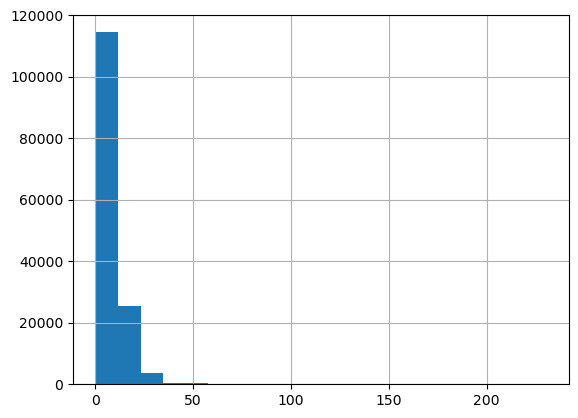

In [64]:
bat_cstr_df["hauteur"].hist(bins=20)

In [65]:
bat_cstr_df.columns

Index(['WKT', 'batiment_construction_id', 'batiment_groupe_id',
       'code_departement_insee', 'code_iris', 'code_commune_insee',
       's_geom_cstr', 'hauteur', 'altitude_sol', 'fictive_geom_cstr'],
      dtype='object')

In [66]:
bat_cstr_df[bat_key]

0         92025000BY0263_da4b17d82c5aff2
1         92032000AD0119_4e733e06aa56395
2         920040000A0390_c01fdc51e741147
3         92002000BN0119_042afe047dae260
4         92002000BN0120_dca7b442f5c5ffd
                       ...              
144446    uf920780026591_64c5700141b3840
144447    uf920780026591_64c5700141b3840
144448    uf920780026591_64c5700141b3840
144449    uf920780026591_64c5700141b3840
144450    uf920780026591_64c5700141b3840
Name: batiment_groupe_id, Length: 144451, dtype: object

In [67]:
bat_cstr_montrouge = bat_cstr_df[bat_cstr_df[bat_key].isin(bat_montrouge.index)]

In [68]:
len(bat_cstr_montrouge)

2702

<AxesSubplot:>

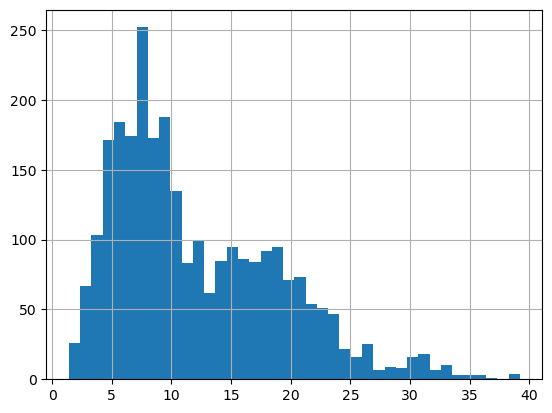

In [69]:
bat_cstr_montrouge["hauteur"].hist(bins=40)

In [70]:
(bat_cstr_montrouge.groupby(bat_key)["batiment_construction_id"].count() > 1).sum()

343

In [71]:
(bat_cstr_montrouge.groupby(bat_key)["batiment_construction_id"].count() > 1).sum()

343

### Cas des bâtiments commerciaux à Montrouge

In [72]:
bat_cstr_comm_montrouge = bat_cstr_montrouge[bat_cstr_montrouge[bat_key].isin(bat_comm_montrouge.index)]

In [73]:
bat_cstr_comm_montrouge

,WKT,batiment_construction_id,batiment_groupe_id,code_departement_insee,code_iris,code_commune_insee,s_geom_cstr,hauteur,altitude_sol,fictive_geom_cstr
1199,MULTIPOLYGON (((650498.838132271 6857859.26495...,u09tszjwwy048ns8bsd9920490000D0246,920490000D0246_02a594850f8fa2c,92,920490110.0,92049.0,NaN,5.0,NaN,1
1223,MULTIPOLYGON (((650132.665517396 6858037.07455...,u09tsz6pvejdmrqrurxb920490000C0088,920490000C0088_3a2024023e2b693,92,920490106.0,92049.0,NaN,15.0,NaN,1
1237,MULTIPOLYGON (((650272.474883104 6857985.17841...,u09tsz7t5njkm8s38puy920490000C0122,920490000C0122_cc78e7c12a6c579,92,920490106.0,92049.0,NaN,21.0,NaN,1
1239,MULTIPOLYGON (((650222.004444656 6857995.29623...,u09tsz7jsy2q5wrmrgn2920490000C0168,920490000C0168_c9fdd9016ae04f4,92,920490106.0,92049.0,NaN,15.0,NaN,1
1244,MULTIPOLYGON (((650507.675416884 6857923.16117...,u09tszmfj99bx4exr95g920490000D0070,920490000D0070_670da366622432e,92,920490110.0,92049.0,NaN,5.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...
141169,"MULTIPOLYGON (((650172.7 6857849.6,650176.6 68...",BATIMENT0000000258741401-1,uf920490024409_2d260cac62ede88,92,920490106.0,92049.0,263.0,9.3,76.0,0
141170,"MULTIPOLYGON (((650150.8 6857832.4,650149.8 68...",BATIMENT0000000258744012-3,uf920490024409_2d260cac62ede88,92,920490106.0,92049.0,670.0,15.3,76.0,0
141171,"MULTIPOLYGON (((650145.1 6857853.6,650146.4 68...",BATIMENT0000000318550327-2,uf920490024409_2d260cac62ede88,92,920490106.0,92049.0,844.0,19.1,75.1,0
141172,"MULTIPOLYGON (((650189.0 6857921.4,650190.1 68...",BATIMENT0000000357698468-1,uf920490024409_2d260cac62ede88,92,920490106.0,92049.0,107.0,14.0,74.9,0


In [74]:
(bat_cstr_comm_montrouge.groupby(bat_key)["batiment_construction_id"].count() > 1).sum()

141

### Etude à la mano de quelques cas 

#### Multiplicité des bâtiments

In [75]:
mult_array = bat_cstr_comm_montrouge.groupby(bat_key)["batiment_construction_id"].count().sort_values(ascending=False)
mult_array

batiment_groupe_id
920490000I0058_b631ef3b77323d8    17
uf920490009851_79d8cb03b57154f    13
uf920490024401_19e9d8bf322bb27    12
uf920490024392_6607571465bf693    11
920490000S0061_5d10f7f257477ea    10
                                  ..
920490000P0153_2265aae63752c7c     1
920490000P0160_3c621a01588b2aa     1
920490000P0163_51ecaeacb65488a     1
920490000Q0013_6888c5cfa377b0c     1
uf920490026010_cc609b9832e9b9d     1
Name: batiment_construction_id, Length: 330, dtype: int64

In [91]:
mult_array.head(25)

batiment_groupe_id
920490000I0058_b631ef3b77323d8    17
uf920490009851_79d8cb03b57154f    13
uf920490024401_19e9d8bf322bb27    12
uf920490024392_6607571465bf693    11
920490000S0061_5d10f7f257477ea    10
uf920490024409_2d260cac62ede88     9
920490000F0056_c3088e25da3ba15     9
920490000R0051_8f30b00a36f6490     8
uf920490009705_46d68ccb4167270     7
uf920490009850_211ad4778f6bfda     7
uf920490009894_c8485734efad606     7
920490000S0008_8b74154a019a31b     7
uf920490024389_7f3ccc2799de586     6
uf920490009886_d06032f9d02a5a4     6
uf920490009865_108d32dbba967a1     6
920490000K0077_9cd71f34a90c8ea     6
920490000F0167_6c144a0878d7066     6
920490000Q0053_24bae3c1076ade2     6
920490000Q0027_d39e9026e1e95f3     6
uf920490009846_cfb7a71be48e8be     5
920490000D0199_d044fdf9c59db06     5
920490000Q0061_7339ef4522e5f06     5
920490000I0003_fa2ae89f1ac0ea1     5
uf920490016724_5aafe22d3958243     5
920490000A0009_86a292adc72bc66     5
Name: batiment_construction_id, dtype: int64

#### Bâtiments avec les plus fortes multiplicités

In [92]:
adresse_df.loc["920490000I0058_b631ef3b77323d8"]

code_departement_insee                                                           92
cle_interop_adr_principale_ban                                     92049_4720_00050
libelle_adr_principale_ban                  50 avenue jean jaures, 92120, Montrouge
nb_adresse_valid_ban                                                              6
fiabilite_cr_adr_niv_1             données croisées à l'adresse moyennement fiables
fiabilite_cr_adr_niv_2            batiment sur parcelle unifiee avec adresses no...
Name: 920490000I0058_b631ef3b77323d8, dtype: object

Vérification faite, il s'agit du complexe du Crédit Agricole ! Ca peut être intéressant de le prendre en compte, mais peut-être pas à ce stade de la discussion !

In [93]:
adresse_df.loc["uf920490009851_79d8cb03b57154f"]

code_departement_insee                                                92
cle_interop_adr_principale_ban                          92049_6150_00001
libelle_adr_principale_ban        1 rue maurice arnoux, 92120, Montrouge
nb_adresse_valid_ban                                                   1
fiabilite_cr_adr_niv_1              données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                  batiment sans voisin à l'adresse
Name: uf920490009851_79d8cb03b57154f, dtype: object

Il s'agit du complexe de la faculté dentaire.

In [78]:
adresse_df.loc["uf920490024401_19e9d8bf322bb27"]

code_departement_insee                                              92
cle_interop_adr_principale_ban                        92049_8115_00006
libelle_adr_principale_ban              6 rue racine, 92120, Montrouge
nb_adresse_valid_ban                                                 3
fiabilite_cr_adr_niv_1            données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                batiment sans voisin à l'adresse
Name: uf920490024401_19e9d8bf322bb27, dtype: object

Il s'agit de l'Ecole maternelle publique Nicolas Boileau.

On va avoir un problème similaire avec toutes les écoles de Montrouge... Est-il possible de les identifier *a priori* ? Voir la suite de l'étude sur ce point...

In [94]:
adresse_df.loc["uf920490024392_6607571465bf693"]

code_departement_insee                                                  92
cle_interop_adr_principale_ban                            92049_6150_00107
libelle_adr_principale_ban        107 rue maurice arnoux, 92120, Montrouge
nb_adresse_valid_ban                                                     5
fiabilite_cr_adr_niv_1                données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                    batiment sans voisin à l'adresse
Name: uf920490024392_6607571465bf693, dtype: object

Il s'agit du complexe sportif ! Là encore, quelque chose à identifier en amont ? (de toute façon, il n'y a pas tant d'installations sportives à Montrouge que ça...).

#### Cas de la résidence Buffalo

In [98]:
adresse_df.loc["920490000S0061_5d10f7f257477ea"]

code_departement_insee                                                           92
cle_interop_adr_principale_ban                                     92049_1415_00039
libelle_adr_principale_ban                          39 rue carves, 92120, Montrouge
nb_adresse_valid_ban                                                             40
fiabilite_cr_adr_niv_1                         données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2            batiment dont les seuls voisins sont des dépen...
Name: 920490000S0061_5d10f7f257477ea, dtype: object

Résidence Buffalo (mais pourquoi est-elle dans cette liste ?!?)

In [100]:
bat_comm_montrouge.loc["920490000S0061_5d10f7f257477ea"]

s_geom_groupe                                                              9361.0
contient_fictive_geom_groupe                                                    0
annee_construction                                                         1958.0
usage_niveau_1_txt                                          Résidentiel collectif
l_usage_1                       [ "Annexe", "Résidentiel", "Commercial et serv...
Name: 920490000S0061_5d10f7f257477ea, dtype: object

De fait, il y a des activités commerciales dans ces bâtiments, mais on peut sans doute changer la définition (et ne prendre en compte `l_usage_1`  que si `usage_niveau_1_txt` n'est pas renseigné ?

In [104]:
adresse_df.loc["uf920490024406_ce635c1d89ccc10"]

code_departement_insee                                                           92
cle_interop_adr_principale_ban                                     92049_4110_00031
libelle_adr_principale_ban                    31 rue gabriel peri, 92120, Montrouge
nb_adresse_valid_ban                                                              2
fiabilite_cr_adr_niv_1             données croisées à l'adresse moyennement fiables
fiabilite_cr_adr_niv_2            batiment sur parcelle unifiee avec adresses no...
Name: uf920490024406_ce635c1d89ccc10, dtype: object

### Identification des écoles

In [79]:
bat_gp_ign.loc["uf920490024401_19e9d8bf322bb27"]

code_departement_insee                                                   92
l_nature                  [ "Indifférenciée", "Industriel, agricole ou c...
l_usage_1                 [ "Commercial et services", "Sportif", "Réside...
l_usage_2                                                 [ "Résidentiel" ]
l_etat                                                     [ "En service" ]
hauteur_mean                                                              7
altitude_sol_mean                                                      79.0
Name: uf920490024401_19e9d8bf322bb27, dtype: object

In [80]:
bat_gp_ign.loc["uf920490024401_19e9d8bf322bb27"]["l_nature"]

'[ "Indifférenciée", "Industriel, agricole ou commercial" ]'

In [81]:
bat_gp_ign.loc["uf920490024401_19e9d8bf322bb27"]["l_nature"]

'[ "Indifférenciée", "Industriel, agricole ou commercial" ]'

In [82]:
bat_gp_ign.loc["uf920490024401_19e9d8bf322bb27"]["l_nature"]

'[ "Indifférenciée", "Industriel, agricole ou commercial" ]'

Hum, pas évident de retrouver qu'il s'agit d'une école à partir de tout ça...

Cependant, le site de la mairie présente la liste des écoles 

* [liste des écoles maternelles](https://www.ville-montrouge.fr/1562-j-inscris-mon-enfant-a-l-ecole-maternelle.htm), publiques et privées.
* [liste des écoles élémentaires](https://www.ville-montrouge.fr/1564-j-inscris-mon-enfant-a-l-ecole-elementaire.htm), publiques et privées.
* [Collèges et lycées](https://www.ville-montrouge.fr/753-le-secondaire.htm), dont le lycée professionnel Jean Monnet.

En faisant la recherche sur [GoRenove](https://particulier.gorenove.fr/) à partir des adresses fournies, on obtient les "identifiants bâtiment BDNB" (en fait, colonne `bat_key`) suivants :

(au 2023-10-17, uniquement les maternelles)

In [83]:
ban_dict = {
    "rabelais_mat": "920490000C0167_a7d6a1e1aa7fcb7 ",
    "boileau":"uf920490024401_19e9d8bf322bb27",
    "haut-mesnil_mat": "uf920490024389_7f3ccc2799de586",
    #"briand_mat": ? pas trouvé sur GoRenove "92049_0045_00087",
    #"buffalo_mat": ? pas trouvé sur GoRenove "92049_9650_00041",
    "berthelot_mat": "uf920490024399_23723cf7aac094c",
    "arnoux_mat": "920490000A0148_d4dfcc07a128b02",
    #"jeanne_darc_mat": ? pas trouvé dans la base adresse...
    "yaguel_yaacov_mat":"uf920490021183_26c68224c38b9e7",
    "pardess_hannah_mat": "920490000O0110_9f18a4514600a8f",
    "queneau_elt": "920490000G0010_54e125a97b6b096",
    "renaudel": "uf920490024390_d3b7f519ee82f90",
    "rabelais": "920490000C0167_a7d6a1e1aa7fcb7",
    "jeanne_darc": "920490000B0262_4c9e065498b4d43",
    "jean_monnet": "920490000X0080_ac0c3301627df2e",
    "genevoix": "920490000R0051_8f30b00a36f6490",
    # "doisneaux": ? pas trouvé sur GoRenove
}

In [84]:
list(ban_dict.values())

['920490000C0167_a7d6a1e1aa7fcb7 ',
 'uf920490024401_19e9d8bf322bb27',
 'uf920490024389_7f3ccc2799de586',
 'uf920490024399_23723cf7aac094c',
 '920490000A0148_d4dfcc07a128b02',
 'uf920490021183_26c68224c38b9e7',
 '920490000O0110_9f18a4514600a8f',
 '920490000G0010_54e125a97b6b096',
 'uf920490024390_d3b7f519ee82f90',
 '920490000C0167_a7d6a1e1aa7fcb7',
 '920490000B0262_4c9e065498b4d43',
 '920490000X0080_ac0c3301627df2e',
 '920490000R0051_8f30b00a36f6490']

In [85]:
adresse_df[adresse_df.index.isin(list(ban_dict.values()))]

,code_departement_insee,cle_interop_adr_principale_ban,libelle_adr_principale_ban,nb_adresse_valid_ban,fiabilite_cr_adr_niv_1,fiabilite_cr_adr_niv_2
batiment_groupe_id,,,,,,
920490000O0110_9f18a4514600a8f,92,92049_9650_00032,"32 rue victor basch, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490021183_26c68224c38b9e7,92,92049_4110_00090,"90 rue gabriel peri, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490024399_23723cf7aac094c,92,92049_6120_00037,"37 rue marcellin berthelot, 92120, Montrouge",2,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000A0148_d4dfcc07a128b02,92,92049_6150_00032,"32 rue maurice arnoux, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000B0262_4c9e065498b4d43,92,92049_3147_00010,"10 place emile creps, 92120, Montrouge",3,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000X0080_ac0c3301627df2e,92,92049_4720_00128,"128 avenue jean jaures, 92120, Montrouge",3,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000C0167_a7d6a1e1aa7fcb7,92,92049_0725_00006,"6 villa du cadran solaire, 92120, Montrouge",17,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000G0010_54e125a97b6b096,92,92049_4140_00057,"57 avenue henri ginoux, 92120, Montrouge",3,données croisées à l'adresse moyennement fiables,batiment sur parcelle unifiee avec adresses no...
920490000R0051_8f30b00a36f6490,92,92049_3555_00029,"29 avenue du fort, 92120, Montrouge",3,données croisées à l'adresse fiables,batiment sans voisin à l'adresse


In [86]:
adresse_df[adresse_df["cle_interop_adr_principale_ban"].str.startswith("92049_4110", na=False)]

,code_departement_insee,cle_interop_adr_principale_ban,libelle_adr_principale_ban,nb_adresse_valid_ban,fiabilite_cr_adr_niv_1,fiabilite_cr_adr_niv_2
batiment_groupe_id,,,,,,
uf920490009700_3752e6624bf676a,92,92049_4110_00107,"107 rue gabriel peri, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000B0032_9c0c17061fcbbd1,92,92049_4110_00061,"61 rue gabriel peri, 92120, Montrouge",2,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000B0235_3061106321ee73e,92,92049_4110_00052,"52 rue gabriel peri, 92120, Montrouge",1,données croisées à l'adresse moyennement fiables,batiment sur parcelle unifiee avec adresses no...
920490000B0261_70208518b862989,92,92049_4110_00040,"40 rue gabriel peri, 92120, Montrouge",2,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000B0183_39ad0de3c3a7bdb,92,92049_4110_00054,"54 rue gabriel peri, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000C0147_ece75fa1dd1c7e9,92,92049_4110_00028,"28 rue gabriel peri, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000D0169_615b169cb7f5d5c,92,92049_4110_00012,"12 rue gabriel peri, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000G0005_e400cd73c69a831,92,92049_4110_00019,"19 rue gabriel peri, 92120, Montrouge",2,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000G0006_5fcad091af0dab5,92,92049_4110_00017,"17 rue gabriel peri, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse


In [87]:
adresse_df[adresse_df["cle_interop_adr_principale_ban"]=="92049_8115_00006"]

,code_departement_insee,cle_interop_adr_principale_ban,libelle_adr_principale_ban,nb_adresse_valid_ban,fiabilite_cr_adr_niv_1,fiabilite_cr_adr_niv_2
batiment_groupe_id,,,,,,
uf920490024401_19e9d8bf322bb27,92,92049_8115_00006,"6 rue racine, 92120, Montrouge",3,données croisées à l'adresse fiables,batiment sans voisin à l'adresse


In [88]:
adresse_df.loc["uf920490024409_2d260cac62ede88"]

code_departement_insee                                              92
cle_interop_adr_principale_ban                        92049_2553_00002
libelle_adr_principale_ban         2 passage draeger, 92120, Montrouge
nb_adresse_valid_ban                                                 6
fiabilite_cr_adr_niv_1            données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                batiment sans voisin à l'adresse
Name: uf920490024409_2d260cac62ede88, dtype: object

In [89]:
adresse_df[(adresse_df["libelle_adr_principale_ban"].str.contains("novembre", na=False)) & (adresse_df["cle_interop_adr_principale_ban"].str.startswith("92049", na=False))]

,code_departement_insee,cle_interop_adr_principale_ban,libelle_adr_principale_ban,nb_adresse_valid_ban,fiabilite_cr_adr_niv_1,fiabilite_cr_adr_niv_2
batiment_groupe_id,,,,,,
920490000B0043_63bf7a51771c48a,92,92049_6850_00013,"13 rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000B0045_bb91a830c229c5c,92,92049_6850_00011,"11 rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000B0047_90b40e424880189,92,92049_6850_00009,"9 rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000B0042_6b8f70fd5247897,92,92049_6850_00015,"15 rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000B0127_f46e47b877f6218,92,92049_6850_00009_bis,"9 B rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000I0024_826fa16ce2d2389,92,92049_6850_00016,"16 rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000I0025_1f43eb0b9733786,92,92049_6850_00014,"14 rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490024400_cfecfb27df7d3e8,92,92049_6850_00001_bis,"1 B rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000I0026_85093950a908bef,92,92049_6850_00012,"12 rue du 11 novembre, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse


### Cas des bâtiments religieux

In [114]:
religieux_bat = full_bat_montrouge[full_bat_montrouge["l_usage_1"].str.contains("Religieux", na=False)]
religieux_bat

,s_geom_groupe,contient_fictive_geom_groupe,annee_construction,usage_niveau_1_txt,l_usage_1
batiment_groupe_id,,,,,
920490000R0052_b1ab36838953008,410.0,0,NaN,NaN,"[ ""Religieux"", ""Résidentiel"" ]"
uf920490021183_26c68224c38b9e7,413.0,0,1990.0,Tertiaire & Autres,"[ ""Religieux"", ""Commercial et services"" ]"
920490000O0203_f932223e208b882,1217.0,0,NaN,Tertiaire & Autres,"[ ""Religieux"", ""Résidentiel"" ]"
uf920490009761_0b2a50085fb86a0,1005.0,0,1937.0,Tertiaire & Autres,"[ ""Religieux"", ""Résidentiel"" ]"
uf920490024406_ce635c1d89ccc10,1426.0,0,1991.0,Tertiaire & Autres,"[ ""Industriel"", ""Religieux"" ]"


In [116]:
adresse_df[adresse_df.index.isin(religieux_bat.index)]

,code_departement_insee,cle_interop_adr_principale_ban,libelle_adr_principale_ban,nb_adresse_valid_ban,fiabilite_cr_adr_niv_1,fiabilite_cr_adr_niv_2
batiment_groupe_id,,,,,,
uf920490021183_26c68224c38b9e7,92,92049_4110_00090,"90 rue gabriel peri, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000O0203_f932223e208b882,92,92049_8160_00093,"93 avenue de la republique, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490009761_0b2a50085fb86a0,92,92049_4720_00101,"101 avenue jean jaures, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490024406_ce635c1d89ccc10,92,92049_4110_00031,"31 rue gabriel peri, 92120, Montrouge",2,données croisées à l'adresse moyennement fiables,batiment sur parcelle unifiee avec adresses no...


NB : le bâtiment `920490000R0052_b1ab36838953008` n'est pas associé à une adresse, mais on peut le [retrouver directement sur GoRenove](https://particulier.gorenove.fr/map?bnb_id=920490000R0052_b1ab36838953008) : il en ressort qu'il s'agit de la chapelle proche de la résidence Buffalo.

Vérification faite à la main des différents bâtiments notés ci-dessus : clairement, on peut tous les exclure du périmètre de l'étude.

### Cas des bâtiments sportifs

Une étude similaire est-elle possible pour les bâtiments sportifs ?

In [119]:
sportif_bat = full_bat_montrouge[full_bat_montrouge["l_usage_1"].str.contains("Sportif", na=False)]
print("Nb résultats: ", len(sportif_bat))

sportif_bat

Nb résultats:  12


,s_geom_groupe,contient_fictive_geom_groupe,annee_construction,usage_niveau_1_txt,l_usage_1
batiment_groupe_id,,,,,
920490000X0081_77ad9dd1f441f85,414.0,0,NaN,NaN,"[ ""Sportif"" ]"
uf920490024407_7881664f4e3459d,867.0,0,1965.0,Résidentiel collectif,"[ ""Sportif"" ]"
920490000U0090_29224b0c30a61fe,474.0,0,2009.0,Tertiaire & Autres,"[ ""Indifférencié"", ""Sportif"" ]"
uf920490019838_35ab98853f07f8e,1038.0,0,NaN,Tertiaire & Autres,"[ ""Sportif"", ""Commercial et services"" ]"
920490000P0153_2265aae63752c7c,2866.0,0,NaN,Tertiaire & Autres,"[ ""Sportif"" ]"
920490000S0008_8b74154a019a31b,4949.0,0,NaN,Tertiaire & Autres,"[ ""Indifférencié"", ""Sportif"" ]"
920490000Q0064_9aa05ec15b973e7,3384.0,0,2015.0,Résidentiel collectif,"[ ""Résidentiel"", ""Sportif"" ]"
920490000R0051_8f30b00a36f6490,9987.0,0,NaN,Tertiaire & Autres,"[ ""Commercial et services"", ""Sportif"" ]"
uf920490024390_d3b7f519ee82f90,2268.0,0,2018.0,Tertiaire & Autres,"[ ""Commercial et services"", ""Sportif"" ]"


In [120]:
adresse_sportif = adresse_df[adresse_df.index.isin(sportif_bat.index)]

print("Nb résultats: ", len(adresse_sportif))

adresse_sportif

Nb résultats:  11


,code_departement_insee,cle_interop_adr_principale_ban,libelle_adr_principale_ban,nb_adresse_valid_ban,fiabilite_cr_adr_niv_1,fiabilite_cr_adr_niv_2
batiment_groupe_id,,,,,,
uf920490024407_7881664f4e3459d,92,92049_9650_00039,"39 rue victor basch, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000U0090_29224b0c30a61fe,92,92049_4440_00014,"14 rue hippolyte mulin, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490019838_35ab98853f07f8e,92,92049_3145_00016,"16 avenue emile boutroux, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000P0153_2265aae63752c7c,92,92049_4140_00091,"91 avenue henri ginoux, 92120, Montrouge",3,données croisées à l'adresse moyennement fiables,batiment sur parcelle unifiee avec adresses no...
920490000S0008_8b74154a019a31b,92,92049_9650_00049,"49 rue victor basch, 92120, Montrouge",3,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000Q0064_9aa05ec15b973e7,92,92049_9615_00035,"35 rue de la vanne, 92120, Montrouge",2,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
920490000R0051_8f30b00a36f6490,92,92049_3555_00029,"29 avenue du fort, 92120, Montrouge",3,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490024390_d3b7f519ee82f90,92,92049_4775_00003,"3 rue jules cheret, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse
uf920490024392_6607571465bf693,92,92049_6150_00107,"107 rue maurice arnoux, 92120, Montrouge",5,données croisées à l'adresse fiables,batiment sans voisin à l'adresse


Le bâtiment sans adresse est [celui-ci](https://particulier.gorenove.fr/map?bnb_id=920490000X0081_77ad9dd1f441f85), qui semble être le gymnase du lycée Jean Monnet. 

### Recherche du beffroi et de tribune

Sur la base de l'exploration des usages et natures réalisée [ci-dessus](#usages_natures), les bâtiments religieux et sportifs sont les seules usages notés par l'IGN qui peuvent être directement intéressants pour nous. Pour référence, je fais ci-dessous une petite recherche pour retrouver une "nature" inhabituelle : "Tribune".

NB: voir la section [Source IGN](#source_ign) pour le DF `aux_ign_df`.

In [17]:
aux_ign_df[aux_ign_df["l_nature"].str.contains("Tour, donjon", na=False)]

,batiment_groupe_id,code_departement_insee,l_nature,l_usage_1,l_usage_2,l_etat,hauteur_mean,altitude_sol_mean
111971,920490000B0112_83be3b044bfe333,92,"[ ""Tour, donjon"", ""Indifférenciée"" ]","[ ""Indifférencié"", ""Commercial et services"" ]",NaN,"[ ""En service"" ]",25,73.0


In [19]:
adresse_df.loc["920490000B0112_83be3b044bfe333"]

code_departement_insee                                                      92
cle_interop_adr_principale_ban                                92049_8160_00032
libelle_adr_principale_ban        32 avenue de la republique, 92120, Montrouge
nb_adresse_valid_ban                                                         2
fiabilite_cr_adr_niv_1                    données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                        batiment sans voisin à l'adresse
Name: 920490000B0112_83be3b044bfe333, dtype: object

Vérification faite, il s'agit bien du [beffroi de Montrouge](https://www.beffroidemontrouge.com/) - même si l'année de construction est plutôt 1930 que 1990 ;-)

In [21]:
tribune = aux_ign_df[aux_ign_df["l_nature"].str.contains("Tribune", na=False)]
tribune

,batiment_groupe_id,code_departement_insee,l_nature,l_usage_1,l_usage_2,l_etat,hauteur_mean,altitude_sol_mean
88664,920490000U0090_29224b0c30a61fe,92,"[ ""Indifférenciée"", ""Tribune"" ]","[ ""Indifférencié"", ""Sportif"" ]","[ ""Commercial et services"" ]","[ ""En service"" ]",6,80.0


In [22]:
adresse_df.loc[tribune[bat_key]]

,code_departement_insee,cle_interop_adr_principale_ban,libelle_adr_principale_ban,nb_adresse_valid_ban,fiabilite_cr_adr_niv_1,fiabilite_cr_adr_niv_2
batiment_groupe_id,,,,,,
920490000U0090_29224b0c30a61fe,92,92049_4440_00014,"14 rue hippolyte mulin, 92120, Montrouge",1,données croisées à l'adresse fiables,batiment sans voisin à l'adresse


# Synthèse : en partant des fonctions du module

In [1]:
%load_ext autoreload
%autoreload 2

from explo_bdnb import get_full_bat_montrouge, select_comm_bat

In [2]:
full_bat_montrouge = get_full_bat_montrouge()

In [3]:
bat_comm_montrouge = select_comm_bat(full_bat_montrouge)

In [4]:
# Sanity checks
#bat_comm_montrouge["l_usage_1"].str.contains("Religieux", na=False).sum()
#bat_comm_montrouge["l_usage_1"].str.contains("Sportif", na=False).sum()

## Bâtiments construction

In [5]:
from explo_bdnb import get_bat_cstr_df, select_bat_cstr, BAT_KEY, get_adresse_df

In [6]:
bat_cstr_df = get_bat_cstr_df()

In [7]:
bat_cstr_montrouge = select_bat_cstr(bat_comm_montrouge, bat_cstr_df)

### Etude des multiplicités

In [8]:
mult_array = bat_cstr_montrouge.groupby(BAT_KEY)["batiment_construction_id"].count().sort_values(ascending=False)
mult_array

batiment_groupe_id
920490000I0058_b631ef3b77323d8    17
920490000F0056_c3088e25da3ba15     9
uf920490009850_211ad4778f6bfda     7
uf920490009894_c8485734efad606     7
uf920490009886_d06032f9d02a5a4     6
                                  ..
920490000M0069_76a3bf433ee0f24     1
920490000M0133_4cd1c2b5494938e     1
920490000N0045_7c7f488ac96233e     1
920490000N0048_e2fdf6dbdb19a6f     1
uf920490026010_cc609b9832e9b9d     1
Name: batiment_construction_id, Length: 243, dtype: int64

In [9]:
mult_array.head(25)

batiment_groupe_id
920490000I0058_b631ef3b77323d8    17
920490000F0056_c3088e25da3ba15     9
uf920490009850_211ad4778f6bfda     7
uf920490009894_c8485734efad606     7
uf920490009886_d06032f9d02a5a4     6
uf920490009865_108d32dbba967a1     6
920490000I0003_fa2ae89f1ac0ea1     5
uf920490009846_cfb7a71be48e8be     5
uf920490016724_5aafe22d3958243     5
uf920490024413_27c36fa80079b89     4
920490000K0035_f91a761c0aaf2a9     4
920490000I0063_f8846a578773b1c     4
920490000Q0025_18fa9f1baafd161     3
920490000Q0015_3c4f406b9d31767     3
uf920490009715_04b09c9d6b044f4     3
uf920490009714_5b06038c11d378b     3
uf920490009845_b37195c106db805     3
uf920490026009_e92d52e340f539e     3
920490000E0141_359c5f768120744     3
uf920490022803_991898496f718a7     3
uf920490019885_a978743de9f88ba     3
920490000F0058_8b4427747a959ed     3
uf920490024394_76cef5bfb72e682     3
920490000K0099_6a76e64f7f8247f     3
920490000H0114_14d3a871adc33d6     3
Name: batiment_construction_id, dtype: int64

In [10]:
# 920490000I0058_b631ef3b77323d8 -> Crédit Agricole (voir plus haut)

In [11]:
adresse_df = get_adresse_df()

In [12]:
adresse_df.loc["920490000F0056_c3088e25da3ba15"]

code_departement_insee                                              92
cle_interop_adr_principale_ban                        92049_9615_00021
libelle_adr_principale_ban        21 rue de la vanne, 92120, Montrouge
nb_adresse_valid_ban                                                 2
fiabilite_cr_adr_niv_1            données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                batiment sans voisin à l'adresse
Name: 920490000F0056_c3088e25da3ba15, dtype: object

Bâtiment de la croix-rouge ! Mais après tout, c'est du tertiaire ordinaire...

In [13]:
adresse_df.loc["uf920490009894_c8485734efad606"]

code_departement_insee                                                92
cle_interop_adr_principale_ban                          92049_5160_00015
libelle_adr_principale_ban        15 rue louis lejeune, 92120, Montrouge
nb_adresse_valid_ban                                                   1
fiabilite_cr_adr_niv_1              données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                  batiment sans voisin à l'adresse
Name: uf920490009894_c8485734efad606, dtype: object

Bâtiment de l'ASN (Autorité de la Sûreté du Nucléaire). Mais après tout, c'est du tertiaire ordinaire...

In [14]:
adresse_df.loc["uf920490009850_211ad4778f6bfda"]

code_departement_insee                                                         92
cle_interop_adr_principale_ban                                   92049_7161_00193
libelle_adr_principale_ban        193 avenue pierre brossolette, 92120, Montrouge
nb_adresse_valid_ban                                                            2
fiabilite_cr_adr_niv_1                       données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                           batiment sans voisin à l'adresse
Name: uf920490009850_211ad4778f6bfda, dtype: object

In [15]:
# uf920490009886_d06032f9d02a5a4 rien de particulier

In [16]:
adresse_df.loc["920490000Q0053_24bae3c1076ade2"]

code_departement_insee                                                      92
cle_interop_adr_principale_ban                                92049_0045_00105
libelle_adr_principale_ban        105 avenue aristide briand, 92120, Montrouge
nb_adresse_valid_ban                                                         3
fiabilite_cr_adr_niv_1                    données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                        batiment sans voisin à l'adresse
Name: 920490000Q0053_24bae3c1076ade2, dtype: object

Maison des associations ! => à exclure.

In [17]:
# uf920490009865_108d32dbba967a1 rien de particulier (poste)
# 920490000I0003_fa2ae89f1ac0ea1 crédit agricole, suite !
# uf920490009846_cfb7a71be48e8be rien de particulier

A ce stade, j'ai l'impression qu'on a écarté les plus grandes sources d'erreur (suivant notre métrique de la multiplicité des constructions pour un groupe de bâtiments donnés).

Il s'agirait peut-être de produire une estimation de la surface associée !

### Cas particulier : pas de géom fictive

In [18]:
ref_bat_key = "920490000Q0025_18fa9f1baafd161"

In [19]:
adresse_df.loc[ref_bat_key]

code_departement_insee                                              92
cle_interop_adr_principale_ban                        92049_9615_00051
libelle_adr_principale_ban        51 rue de la vanne, 92120, Montrouge
nb_adresse_valid_ban                                                 3
fiabilite_cr_adr_niv_1            données croisées à l'adresse fiables
fiabilite_cr_adr_niv_2                batiment sans voisin à l'adresse
Name: 920490000Q0025_18fa9f1baafd161, dtype: object

In [20]:
full_bat_montrouge.loc[ref_bat_key]

s_geom_groupe                                         1388.0
contient_fictive_geom_groupe                               0
annee_construction                                    2005.0
usage_niveau_1_txt                        Tertiaire & Autres
l_nature                                [ "Indifférenciée" ]
l_usage_1                       [ "Commercial et services" ]
Name: 920490000Q0025_18fa9f1baafd161, dtype: object

Pas de "fictive_geom_groupe". Quelles sont les constructions associées ?

In [21]:
from explo_bdnb import get_bat_cstr

In [22]:
aux_ref_bat_cstr = get_bat_cstr(ref_bat_key).copy()
aux_ref_bat_cstr

,WKT,batiment_construction_id,batiment_groupe_id,code_departement_insee,code_iris,code_commune_insee,s_geom_cstr,hauteur,altitude_sol,fictive_geom_cstr
127356,"MULTIPOLYGON (((650661.2 6857275.1,650656.8 68...",BATIMENT0000000240212747-2,920490000Q0025_18fa9f1baafd161,92,920490110.0,92049.0,365.0,10.0,81.0,0
127357,"MULTIPOLYGON (((650701.5 6857261.5,650699.1 68...",BATIMENT0000000240212748-2,920490000Q0025_18fa9f1baafd161,92,920490110.0,92049.0,694.0,10.6,81.0,0
127358,"MULTIPOLYGON (((650698.1 6857227.5,650654.3 68...",BATIMENT0000000240212794-1,920490000Q0025_18fa9f1baafd161,92,920490110.0,92049.0,329.0,6.2,80.1,0


On peut partir de l'hypothèse que le `s_geom_groupe` dans le `batiment_groupe` correspond à la somme des `s_geom_cstr`...

Dans ces conditions, la surface disponible pour ce bâtiment s'estime sous la forme : 

In [23]:
import numpy as np

floor_height = 2.5 # in m

In [24]:
aux_ref_bat_cstr["levels_estim"] = (aux_ref_bat_cstr["hauteur"]/floor_height).apply(np.floor)

In [25]:
aux_ref_bat_cstr["s_total_cstr_estim"] = aux_ref_bat_cstr["levels_estim"] * aux_ref_bat_cstr["s_geom_cstr"]

In [26]:
aux_ref_bat_cstr

,WKT,batiment_construction_id,batiment_groupe_id,code_departement_insee,code_iris,code_commune_insee,s_geom_cstr,hauteur,altitude_sol,fictive_geom_cstr,levels_estim,s_total_cstr_estim
127356,"MULTIPOLYGON (((650661.2 6857275.1,650656.8 68...",BATIMENT0000000240212747-2,920490000Q0025_18fa9f1baafd161,92,920490110.0,92049.0,365.0,10.0,81.0,0,4.0,1460.0
127357,"MULTIPOLYGON (((650701.5 6857261.5,650699.1 68...",BATIMENT0000000240212748-2,920490000Q0025_18fa9f1baafd161,92,920490110.0,92049.0,694.0,10.6,81.0,0,4.0,2776.0
127358,"MULTIPOLYGON (((650698.1 6857227.5,650654.3 68...",BATIMENT0000000240212794-1,920490000Q0025_18fa9f1baafd161,92,920490110.0,92049.0,329.0,6.2,80.1,0,2.0,658.0


Et ensuite, on peut créer la colonne `"s_total_gp_estim"` grâce à un group by...

## Estimation naïve des surfaces

On part sur une hauteur d'étage de 2,5 m (pour fixer les idées).

In [27]:
from explo_bdnb import estimate_levels, estimate_s_total_cstr

In [28]:
bat_cstr_montrouge = estimate_levels(bat_cstr_montrouge)

In [29]:
bat_cstr_montrouge = estimate_s_total_cstr(bat_cstr_montrouge)

In [30]:
bat_cstr_montrouge

,WKT,batiment_construction_id,batiment_groupe_id,code_departement_insee,code_iris,code_commune_insee,s_geom_cstr,hauteur,altitude_sol,fictive_geom_cstr,levels_estim,s_total_cstr_estim
1199,MULTIPOLYGON (((650498.838132271 6857859.26495...,u09tszjwwy048ns8bsd9920490000D0246,920490000D0246_02a594850f8fa2c,92,920490110.0,92049.0,NaN,5.0,NaN,1,2.0,NaN
1223,MULTIPOLYGON (((650132.665517396 6858037.07455...,u09tsz6pvejdmrqrurxb920490000C0088,920490000C0088_3a2024023e2b693,92,920490106.0,92049.0,NaN,15.0,NaN,1,6.0,NaN
1237,MULTIPOLYGON (((650272.474883104 6857985.17841...,u09tsz7t5njkm8s38puy920490000C0122,920490000C0122_cc78e7c12a6c579,92,920490106.0,92049.0,NaN,21.0,NaN,1,8.0,NaN
1239,MULTIPOLYGON (((650222.004444656 6857995.29623...,u09tsz7jsy2q5wrmrgn2920490000C0168,920490000C0168_c9fdd9016ae04f4,92,920490106.0,92049.0,NaN,15.0,NaN,1,6.0,NaN
1244,MULTIPOLYGON (((650507.675416884 6857923.16117...,u09tszmfj99bx4exr95g920490000D0070,920490000D0070_670da366622432e,92,920490110.0,92049.0,NaN,5.0,NaN,1,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
141081,"MULTIPOLYGON (((649946.9 6857469.0,649974.4 68...",BATIMENT0000000245573529-2,uf920490009865_108d32dbba967a1,92,920490107.0,92049.0,397.0,20.4,75.7,0,8.0,3176.0
141082,"MULTIPOLYGON (((649969.5 6857444.7,649967.9 68...",BATIMENT0000000245573530-1,uf920490009865_108d32dbba967a1,92,920490107.0,92049.0,112.0,13.8,75.7,0,5.0,560.0
141083,"MULTIPOLYGON (((649980.3 6857469.1,649980.4 68...",BATIMENT0000000245573531-4,uf920490009865_108d32dbba967a1,92,920490107.0,92049.0,417.0,5.1,76.9,0,2.0,834.0
141084,"MULTIPOLYGON (((650539.7 6857180.4,650523.7 68...",BATIMENT0000000240212992-1,uf920490009871_74a0268761263cf,92,920490110.0,92049.0,270.0,22.8,79.0,0,9.0,2430.0


In [31]:
bat_comm_montrouge["s_total_gp_estim"] = bat_cstr_montrouge.groupby(BAT_KEY)["s_total_cstr_estim"].sum()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20312\1363936880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat_comm_montrouge["s_total_gp_estim"] = bat_cstr_montrouge.groupby(BAT_KEY)["s_total_cstr_estim"].sum()


In [32]:
bat_comm_montrouge

,s_geom_groupe,contient_fictive_geom_groupe,annee_construction,usage_niveau_1_txt,l_nature,l_usage_1,s_total_gp_estim
batiment_groupe_id,,,,,,,
920490000D0246_02a594850f8fa2c,NaN,1,NaN,Tertiaire & Autres,NaN,NaN,0.0
920490000C0088_3a2024023e2b693,NaN,1,NaN,Tertiaire & Autres,NaN,NaN,0.0
920490000C0122_cc78e7c12a6c579,NaN,1,2014.0,Tertiaire & Autres,NaN,NaN,0.0
920490000C0168_c9fdd9016ae04f4,NaN,1,1990.0,Tertiaire & Autres,NaN,NaN,0.0
920490000D0070_670da366622432e,NaN,1,NaN,Tertiaire & Autres,NaN,NaN,0.0
...,...,...,...,...,...,...,...
uf920490009850_211ad4778f6bfda,4168.0,0,1990.0,Tertiaire & Autres,"[ ""Indifférenciée"" ]","[ ""Commercial et services"" ]",17370.0
uf920490024394_76cef5bfb72e682,3119.0,0,1972.0,Tertiaire & Autres,"[ ""Industriel, agricole ou commercial"", ""Indif...","[ ""Indifférencié"", ""Résidentiel"", ""Commercial ...",7626.0
uf920490024413_27c36fa80079b89,1249.0,0,2011.0,Tertiaire & Autres,"[ ""Indifférenciée"" ]","[ ""Commercial et services"", ""Résidentiel"" ]",3702.0


Clairement, quand on a un "fictive_geom_cstr", il se passe des choses désagréables...

### Cas particulier : géom fictive

In [33]:
ref_bat_key = "920490000C0122_cc78e7c12a6c579"

In [34]:
mult_array[ref_bat_key]

1

In [35]:
aux_ref_bat_cstr = get_bat_cstr(ref_bat_key).copy()
aux_ref_bat_cstr

,WKT,batiment_construction_id,batiment_groupe_id,code_departement_insee,code_iris,code_commune_insee,s_geom_cstr,hauteur,altitude_sol,fictive_geom_cstr
1237,MULTIPOLYGON (((650272.474883104 6857985.17841...,u09tsz7t5njkm8s38puy920490000C0122,920490000C0122_cc78e7c12a6c579,92,920490106.0,92049.0,NaN,21.0,NaN,1


Sur [GoRenove](https://particulier.gorenove.fr/map?bnb_id=920490000C0122_cc78e7c12a6c579), ce bâtiment apparaît comme un hexagone. 

### Etude des bâtiments avec géom. fictive

In [36]:
nbr_fictive_geom = bat_comm_montrouge["contient_fictive_geom_groupe"].sum()
print("Nbr fictive geom: ", nbr_fictive_geom)
print("Proportion: ", nbr_fictive_geom/len(bat_comm_montrouge))

Nbr fictive geom:  28
Proportion:  0.11522633744855967


Y a-t-il des bâtiments groupes avec une géom. fictive mais pas que ?

In [37]:
idx_fictive_geom = bat_comm_montrouge[bat_comm_montrouge["contient_fictive_geom_groupe"] == 1].index

In [38]:
bat_gp_mult_fictive_geom = [idx for idx in idx_fictive_geom if idx in mult_array[mult_array > 1].index]
bat_gp_mult_fictive_geom

['920490000L0097_3d73b7a78466609']

In [39]:
get_bat_cstr("920490000L0097_3d73b7a78466609")

,WKT,batiment_construction_id,batiment_groupe_id,code_departement_insee,code_iris,code_commune_insee,s_geom_cstr,hauteur,altitude_sol,fictive_geom_cstr
4134,"MULTIPOLYGON (((648876.4 6857387.8,648872.9 68...",BATIMENT0000002206017960-3,920490000L0097_3d73b7a78466609,92,920490114.0,92049.0,NaN,5.0,NaN,1
4135,"MULTIPOLYGON (((648893.9 6857386.4,648900.7 68...",BATIMENT0000002245307204-2,920490000L0097_3d73b7a78466609,92,920490114.0,92049.0,NaN,5.0,NaN,1


### Vérification : géom. fictive

Ici, nous vérifions s'il existe des bâtiments pour lesquels on a à la fois :

* `contient_fictive_geom_groupe == 1`
* `s_total_gp_estim` est non nul

In [41]:
mask = (bat_comm_montrouge["contient_fictive_geom_groupe"]==1) & (bat_comm_montrouge["s_total_gp_estim"] != 0)

bat_comm_montrouge[mask]

,s_geom_groupe,contient_fictive_geom_groupe,annee_construction,usage_niveau_1_txt,l_nature,l_usage_1,s_total_gp_estim
batiment_groupe_id,,,,,,,


Dans ce cas, le problème ne se pose pas !

## Résultat : surface de bureau totale à Montrouge

NB : 
* l'évaluation ci-dessous est très imparfaite (mais l'ordre de grandeur devrait être bon).
* les bâtiments du boulevard Romain Rolland ne sont pas couverts (de façon générale) - voir également la discussion sur les bâtiments avec une géométrie fictive.

In [42]:
bat_comm_montrouge["s_total_gp_estim"].sum()

995402.0

Notre estimation est qu'il y a ~ 1 million de m2 de bureaux à Montrouge (?!?).

Ceci est à comparer avec le rapport de l'ORIE (Observatoire Régional de l'Immobilier d'Entreprise en Île-de-France) en date du 31 décembre 2021, qui estime le parc de bureaux francilien à 55 Mm2.

Pour comparaison, voir les sources suivantes : 

* [Communiqué de presse](https://www.orie.asso.fr/sites/default/files/fichiers/cp_orie_parc_de_bureaux_2022_vf.pdf) de l'ORIE ; 
* statistiques du [GIE ImmoStat](https://www.immostat.com/informations).

### Compléments méthodologiques

Nombre total de "bâtiments" (~ adresses) listés :

In [43]:
len(bat_comm_montrouge)

243

dont une certaine fraction comporte une "géométrie fictive" (donc non pris en compte dans l'évaluation de surface globale proposée ici) : 

In [46]:
nb_bat_geom_fictive = bat_comm_montrouge["contient_fictive_geom_groupe"].sum()

print(f"Bâtiments comportant une géométrie fictive : {nb_bat_geom_fictive}, soit {nb_bat_geom_fictive/len(bat_comm_montrouge)*100:.1f}% du nombre total de bâtiments identifiés.")

Bâtiments comportant une géométrie fictive : 28, soit 11.5% du nombre total de bâtiments identifiés.


Notre estimation est suffisamment imparfaite pour qu'il ne soit pas pertinent d'ajouter ces 11 % au total... Toutefois, il est à noter que le boulevard Romain Rolland n'est pas couvert alors même qu'il semble représenter une fraction significative des surfaces totales disponibles.

# Intégration de sources OSM

On peut également chercher à interroger les données issues de Open Street Map (OSM). Voir [cette page](https://wiki.openstreetmap.org/wiki/OSMPythonTools) pour une introduction.

Pour référence, noter également [cette page](https://wiki.openstreetmap.org/wiki/Key:level) et surtout [celle-ci](https://wiki.openstreetmap.org/wiki/Key:building:levels).